<a href="https://colab.research.google.com/github/sesquivelc/Sales-Demand/blob/main/Trabajo_final_Forescating_de_Indicadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final - Saul Esquivel Condori

Importamos los módulos necesarios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from datetime import datetime
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Leemos nuestra serie de tiempo desde un archvo csv**

In [ ]:
# Importar datos en formato csv.
#custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")
Salesd = pd.read_csv('/content/drive/MyDrive/Forecast/SalesDemand.csv',encoding='latin-1',sep=';')

In [ ]:
Salesd['date'] = pd.to_datetime(Salesd['date'], format='%d/%m/%Y')
#Salesd['periodo'] = Salesd['date'].dt.strftime('%Y%m')

In [ ]:
#Validamos la correcta carga de la base de datos
#===============================================
Salesd.head(10)

,date,store,item,sales
0,2013-01-01,1.0,1.0,13.0
1,2013-01-02,1.0,1.0,11.0
2,2013-01-03,1.0,1.0,14.0
3,2013-01-04,1.0,1.0,13.0
4,2013-01-05,1.0,1.0,10.0
5,2013-01-06,1.0,1.0,12.0
6,2013-01-07,1.0,1.0,10.0
7,2013-01-08,1.0,1.0,9.0
8,2013-01-09,1.0,1.0,12.0
9,2013-01-10,1.0,1.0,9.0


In [ ]:
#list(Salesd.groupby('item'))

In [ ]:
Salesd.dtypes

date     datetime64[ns]
store           float64
item            float64
sales           float64
dtype: object

In [ ]:
Salesd.shape

(958000, 4)

In [ ]:
Salesd.info()
#debemos  filtrar los vacios, obtaremos por filtrar el campo 'date'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958000 entries, 0 to 957999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  float64       
 2   item    913000 non-null  float64       
 3   sales   913000 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 29.2 MB


In [ ]:
Sales = Salesd[Salesd["date"].notna()]

In [ ]:
Sales.shape
#Hemos retirado 45'000 registros (4.7%) con date null.

(913000, 4)

In [ ]:
Sales.info()
# observamos que desaparecieron los nulos en todos los campos.
# a continuación filtraremos algunas items y tiendas para empezar el analisis y posterior forecast.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  float64       
 2   item    913000 non-null  float64       
 3   sales   913000 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 34.8 MB


In [ ]:
Sales.head()

,date,store,item,sales
0,2013-01-01,1.0,1.0,13.0
1,2013-01-02,1.0,1.0,11.0
2,2013-01-03,1.0,1.0,14.0
3,2013-01-04,1.0,1.0,13.0
4,2013-01-05,1.0,1.0,10.0


In [ ]:
Sales_store = Sales[['store','sales']]
Sales_store_2 = Sales_store.groupby(['store']).sum()
Sales_store_2.sort_values(by="sales", ascending=False)
#tomaremos las 5 tiendas con mayores ventas totales y que representan mas del 50% de ventas acumuladas

,sales
store,
2.0,6120128.0
8.0,5856169.0
3.0,5435144.0
10.0,5360158.0
9.0,5025976.0
4.0,5012639.0
1.0,4315603.0
5.0,3631016.0
6.0,3627670.0


In [ ]:
Sales_item = Sales[['item','sales']]
Sales_item_2 = Sales_item.groupby(['item']).sum()
Sales_item_2.sort_values(by="sales", ascending=False)
#tomaremos los 18 items con mayores ventas totales y que representan mas del 50% de ventas acumuladas

,sales
item,
15.0,1607442.0
28.0,1604713.0
13.0,1539621.0
18.0,1538876.0
25.0,1473334.0
45.0,1471467.0
38.0,1470330.0
22.0,1469971.0
36.0,1406548.0


In [ ]:
Sales1 = Sales[Sales['store'].isin([2,8,3,10,9])]
Sales2 = Sales1[Sales1['item'].isin([15,28,13,18,25,45,38,22,36,8,10,11,12,29,33,24,50,35])]

In [ ]:
Sales2.info()
# el analisis lo haremos sobre 73'040 registros

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164340 entries, 129646 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    164340 non-null  datetime64[ns]
 1   store   164340 non-null  float64       
 2   item    164340 non-null  float64       
 3   sales   164340 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.3 MB


In [ ]:
#Sales2[['date','sales']]
Sales3 = Sales2[Sales2['date']=='2013-01-01']
Sales3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 129646 to 911174
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    90 non-null     datetime64[ns]
 1   store   90 non-null     float64       
 2   item    90 non-null     float64       
 3   sales   90 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.5 KB


In [ ]:
Sales3 = Sales2[['date','sales']]

In [ ]:
Sales4 = Sales3.groupby(['date']).sum()
Sales4.head()
# se observa que falta el index, que resetearemos a continuación.

,sales
date,
2013-01-01,4133.0
2013-01-02,4255.0
2013-01-03,4308.0
2013-01-04,4636.0
2013-01-05,5033.0


In [ ]:
Sales4.reset_index(level=0, inplace=True)
#Sales4['Id'] = np.arange(len(Sales4)) sirve para agregar columna con numeros consecutivos como un index
Sales4

,date,sales
0,2013-01-01,4133.0
1,2013-01-02,4255.0
2,2013-01-03,4308.0
3,2013-01-04,4636.0
4,2013-01-05,5033.0
...,...,...
1821,2017-12-27,6137.0
1822,2017-12-28,6595.0
1823,2017-12-29,7223.0
1824,2017-12-30,7714.0


In [ ]:
Sales4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1826 non-null   datetime64[ns]
 1   sales   1826 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


**Graficamos la serie de tiempo**

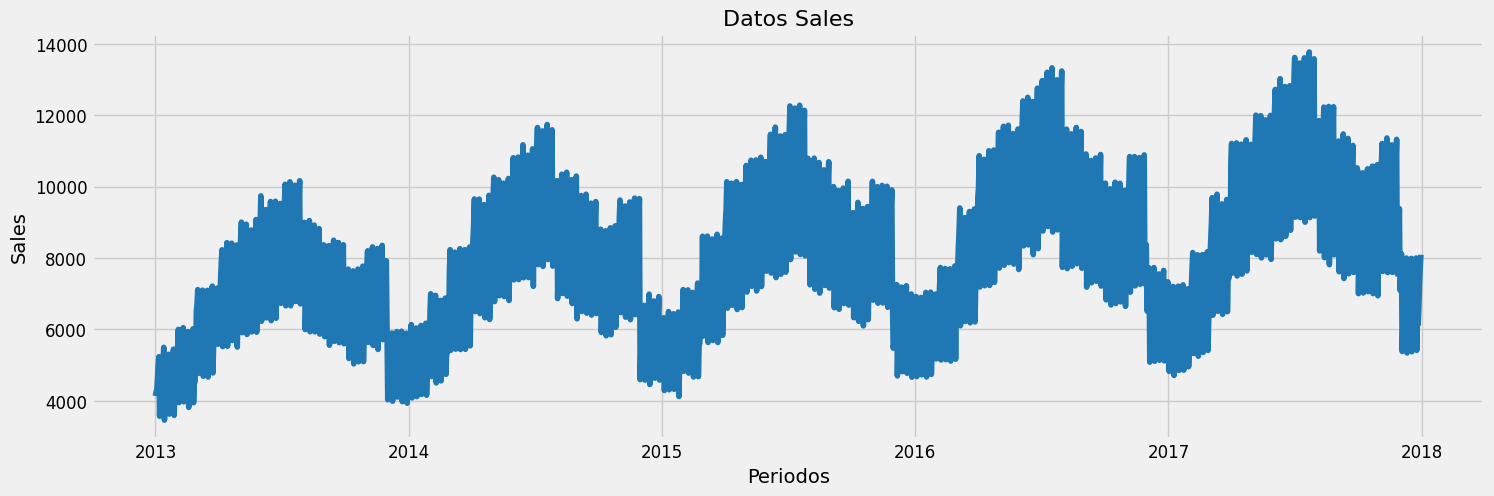

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(Sales4.date, Sales4.sales,color='tab:blue')
plt.xlabel('Periodos')
plt.ylabel('Sales')
plt.title('Datos Sales', fontsize=16)
#plt.gca().set(title='Serie CQI', xlabel=df_1.RESULT_TIME, ylabel=df_1.CQI)
plt.show()

In [ ]:
Sales4['Year'] = Sales4['date'].dt.strftime('%Y')
Sales4['Month'] = Sales4['date'].dt.strftime('%m')
Sales4['Month'] = Sales4.Month.astype(int)
Sales4.head()
Sales4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1826 non-null   datetime64[ns]
 1   sales   1826 non-null   float64       
 2   Year    1826 non-null   object        
 3   Month   1826 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 57.2+ KB


<Axes: xlabel='Month', ylabel='sales'>

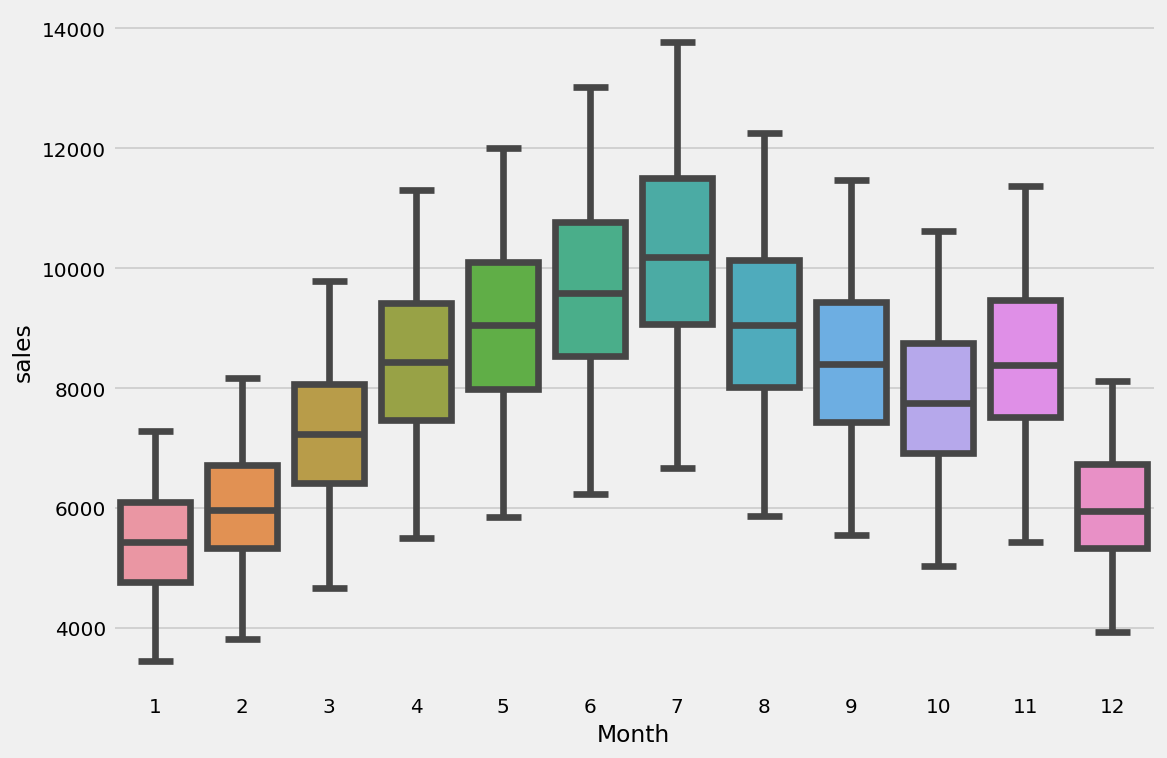

In [ ]:
sns.boxplot(x = 'Month', y = 'sales', data = Sales4)

**Graficamos las cajas agregadas**

<Axes: xlabel='Month', ylabel='sales'>

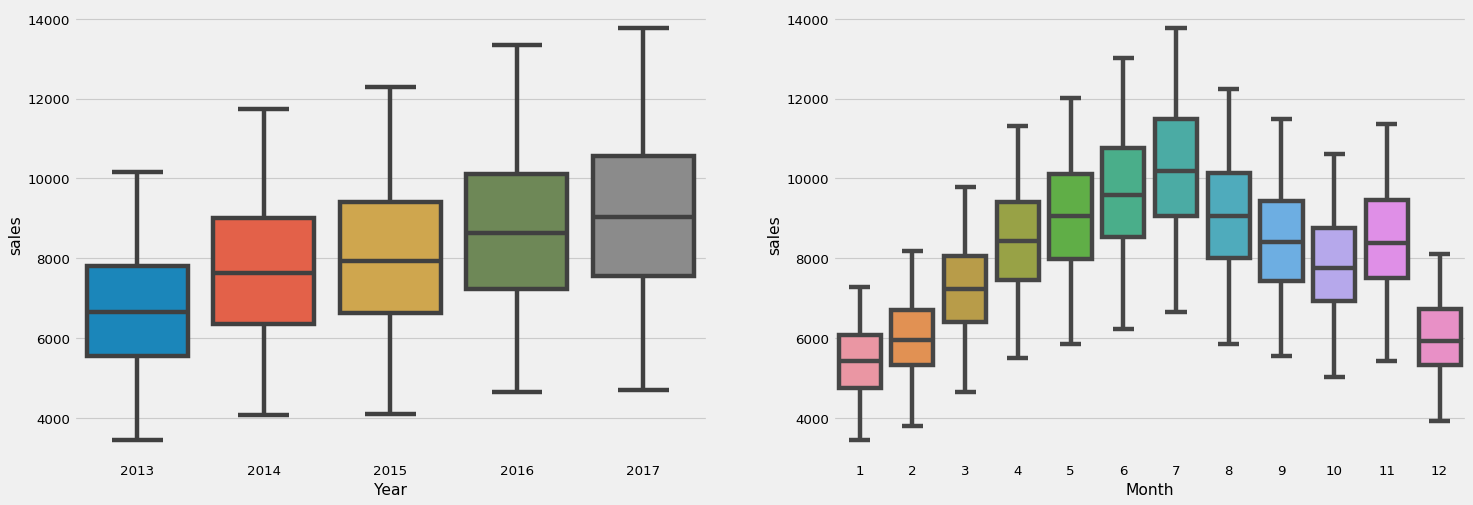

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='sales', data=Sales4, ax=axes[0])
sns.boxplot(x='Month', y='sales', data=Sales4, ax=axes[1])

**Agrupando periodos**

In [ ]:
# agrupando por periodos específicos
Sales_mes= Sales4[['date','sales']]

In [ ]:
Sales_mes.set_index('date',inplace = True)

In [ ]:
Sales_mes.head(10)

,sales
date,
2013-01-01,4133.0
2013-01-02,4255.0
2013-01-03,4308.0
2013-01-04,4636.0
2013-01-05,5033.0
2013-01-06,5235.0
2013-01-07,3567.0
2013-01-08,4224.0
2013-01-09,4217.0


In [ ]:
# agrupamos los datos
Sales_mes = Sales_mes.resample('M').sum()
Sales_year = Sales_mes.resample('Y').mean()
Sales_quarter = Sales_mes.resample('Q').mean()


In [ ]:
Sales_mes.head()

,sales
date,
2013-01-31,138832.0
2013-02-28,140085.0
2013-03-31,189060.0
2013-04-30,208446.0
2013-05-31,233266.0


In [ ]:
print(Sales_mes.shape)
print(Sales_year.shape)
print(Sales_quarter.shape)

(60, 1)
(5, 1)
(20, 1)


In [ ]:
Sales_mes.head(10)

,sales
date,
2013-01-31,138832.0
2013-02-28,140085.0
2013-03-31,189060.0
2013-04-30,208446.0
2013-05-31,233266.0
2013-06-30,243439.0
2013-07-31,261151.0
2013-08-31,234651.0
2013-09-30,210757.0


In [ ]:
Sales_quarter.head(10)

,sales
date,
2013-03-31,155992.333333
2013-06-30,228383.666667
2013-09-30,235519.666667
2013-12-31,188785.333333
2014-03-31,179207.333333
2014-06-30,262778.666667
2014-09-30,271198.666667
2014-12-31,217692.000000
2015-03-31,186810.000000


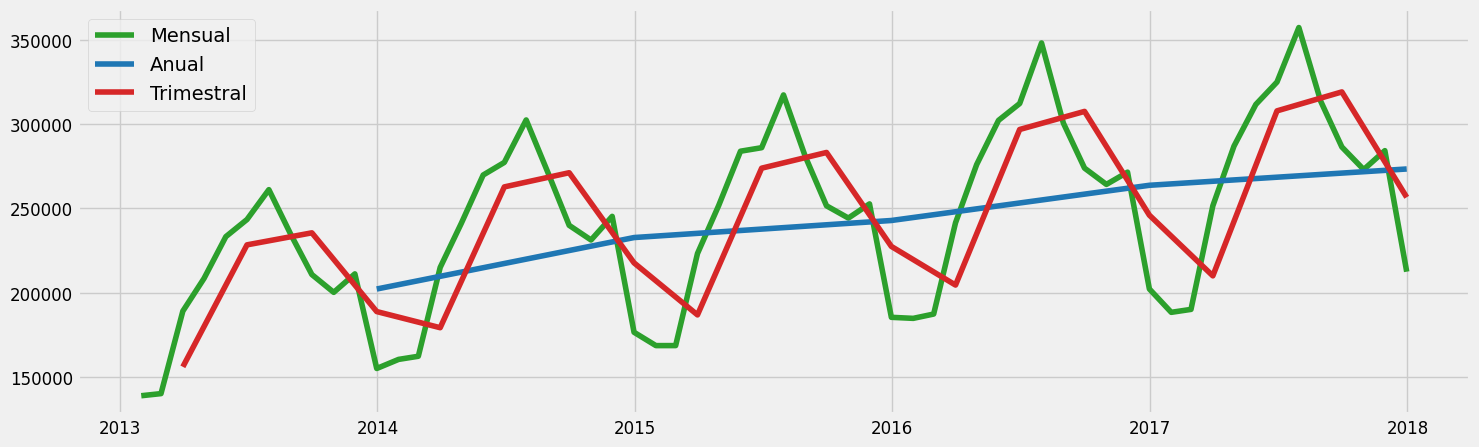

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(Sales_mes.sales,color='tab:green',label='Mensual')
plt.plot(Sales_year.sales,color='tab:blue',label='Anual')
plt.plot(Sales_quarter.sales,color='tab:red',label='Trimestral')
plt.legend()
plt.show()

**Prophet**

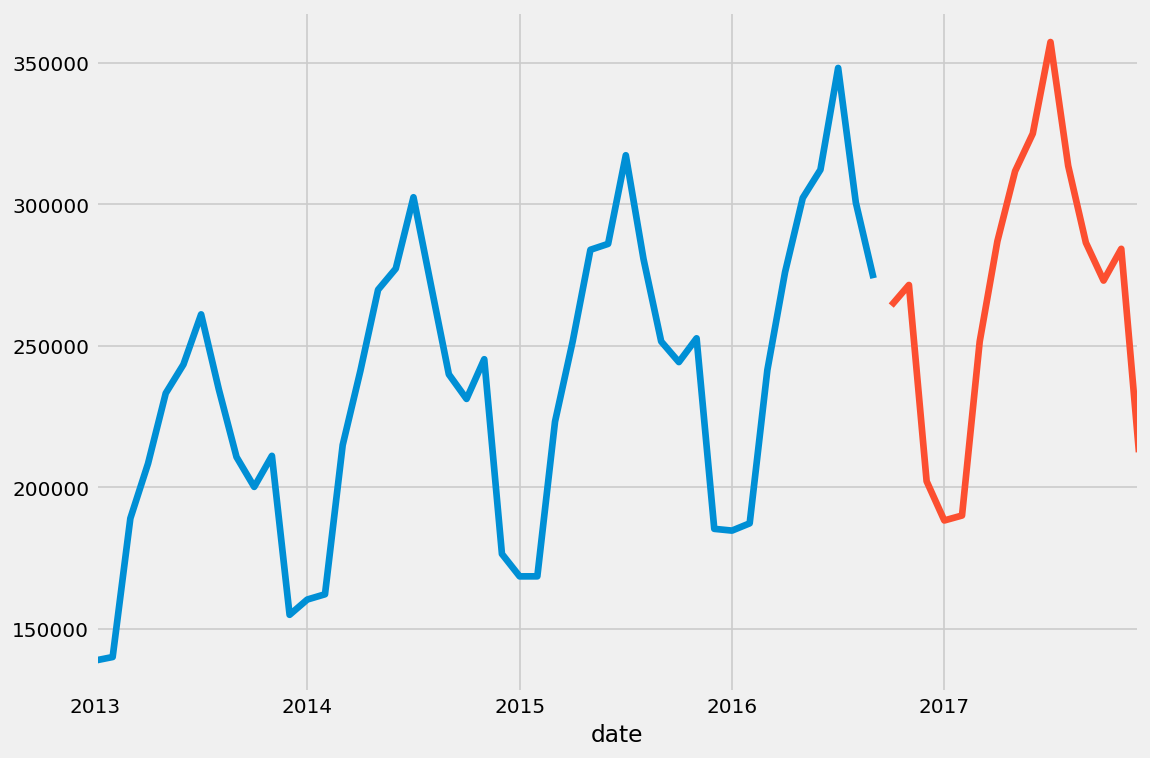

In [ ]:
#divide into train and validation set
train = Sales_mes[:int(0.75*(len(Sales_mes)))]
valid = Sales_mes[int(0.75*(len(Sales_mes))):]

#plotting the data
train['sales'].plot()
valid['sales'].plot()
plt.show()

In [ ]:
train.head()

,sales
date,
2013-01-31,138832.0
2013-02-28,140085.0
2013-03-31,189060.0
2013-04-30,208446.0
2013-05-31,233266.0


In [ ]:
print(train.shape)
print(valid.shape)

(45, 1)
(15, 1)


In [ ]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.sales.values

In [ ]:
train_prophet.head()

,ds,y
0,2013-01-31,138832.0
1,2013-02-28,140085.0
2,2013-03-31,189060.0
3,2013-04-30,208446.0
4,2013-05-31,233266.0


In [ ]:
import os
# Let cmdstanpy know where CmdStan is
os.environ["CMDSTAN"] = "./cmdstan-2.23.0"

from prophet import Prophet

In [ ]:
#instantiate Prophet with only yearly seasonality as our data is monthly
model = Prophet()
model.fit(train_prophet) #fit the model with your dataframe

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpivo66ed6/xhraar48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpivo66ed6/_160n6tg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21913', 'data', 'file=/tmp/tmpivo66ed6/xhraar48.json', 'init=/tmp/tmpivo66ed6/_160n6tg.json', 'output', 'file=/tmp/tmpivo66ed6/prophet_model7ghz2_g0/prophet_model-20230416040619.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:06:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:06:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 15, freq = 'MS')
future.head()

,ds
0,2013-01-31
1,2013-02-28
2,2013-03-31
3,2013-04-30
4,2013-05-31


In [ ]:
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,2013-01-31,139497.884045
1,2013-02-28,135657.692817
2,2013-03-31,185367.435162
3,2013-04-30,211182.155410
4,2013-05-31,236182.728521
5,2013-06-30,243149.344005
6,2013-07-31,269092.539389
7,2013-08-31,233979.690346
8,2013-09-30,208702.383870
9,2013-10-31,201909.467924


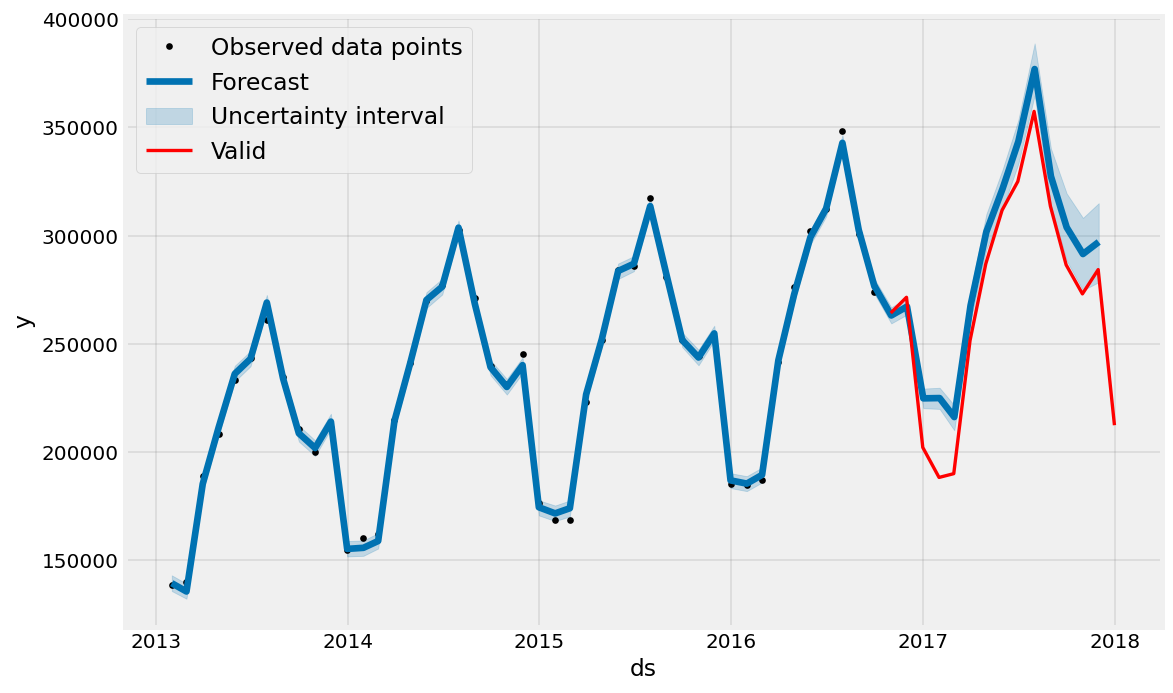

In [ ]:
fig = model.plot(forecast)
#plot the predictions for validation set
plt.plot(valid, label='Valid', color = 'red', linewidth = 2)
plt.legend()
plt.show()

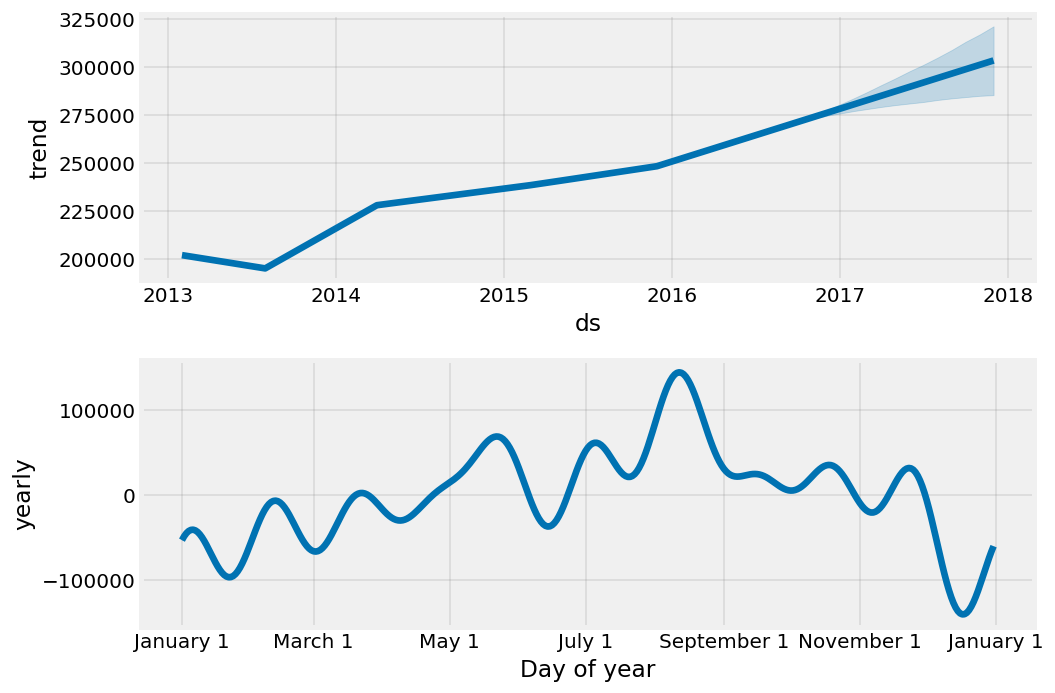

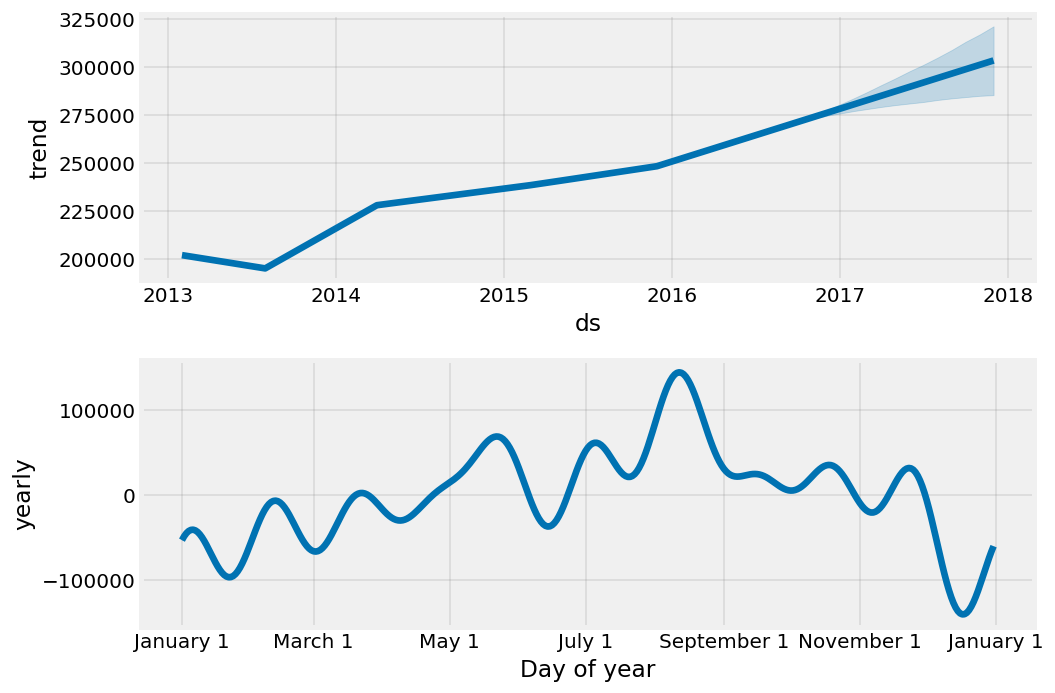

In [ ]:
model.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [ ]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [ ]:
evaluate_forecast(Sales_mes, forecast.yhat)
# se obtiene un r2 = 86%, continuemos buscando otro modelo que otorgue un mejor ajuste.

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.860022,9370.745482,2826.441965,3.850386e+08,0.005914,19622.400557


In [ ]:
#definiendo que la estacionalidad sea anual y el modelo multiplicativo
model = Prophet(yearly_seasonality=True,seasonality_mode= 'multiplicative')
model.fit(train_prophet) #fit the model with your dataframe

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpivo66ed6/2tmnzzjq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpivo66ed6/zczjhab9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58107', 'data', 'file=/tmp/tmpivo66ed6/2tmnzzjq.json', 'init=/tmp/tmpivo66ed6/zczjhab9.json', 'output', 'file=/tmp/tmpivo66ed6/prophet_modelau6k_pcj/prophet_model-20230416040622.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:06:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


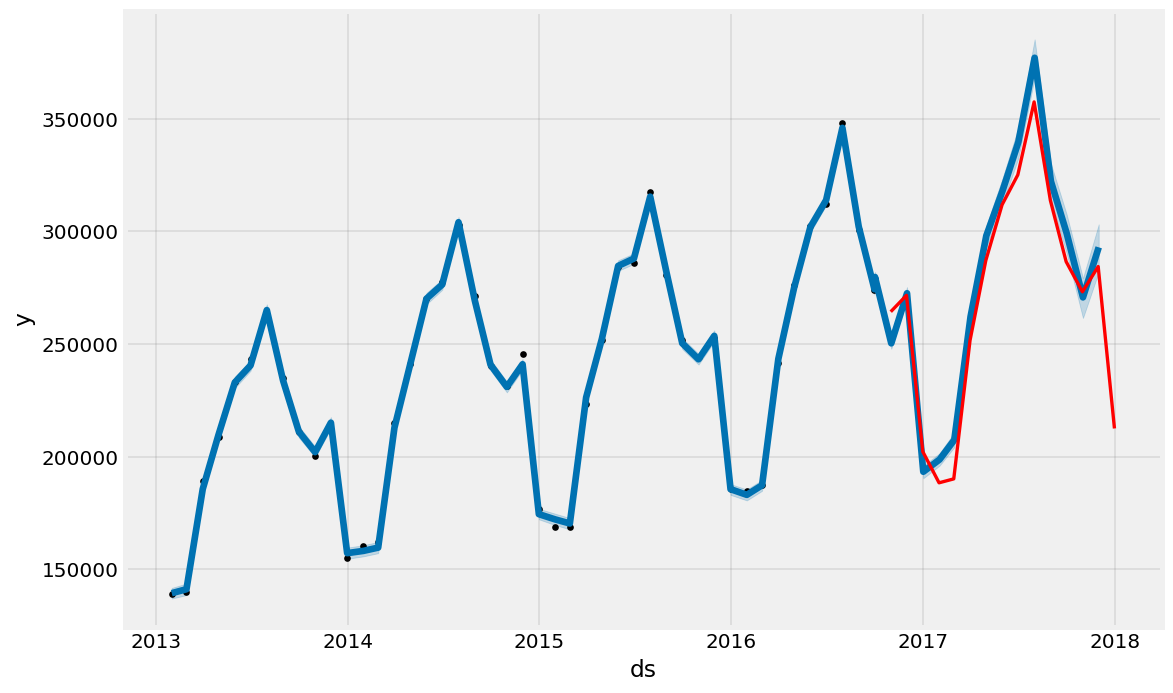

In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 15, freq = 'MS')
forecast = model.predict(future)
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()

In [ ]:
evaluate_forecast(Sales_mes, forecast.yhat)
#Se observa que los errores tanto del Prophet Aditivo como Multiplicativo son los mismos, dado que hay pocos periodos en el train analizado.

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.869003,8626.562976,1847.768639,3.603366e+08,0.005284,18982.534849


# **Simple exponencial smoothing (SES)**

<Axes: title={'center': 'Single Exponential Smoothing'}, xlabel='date'>

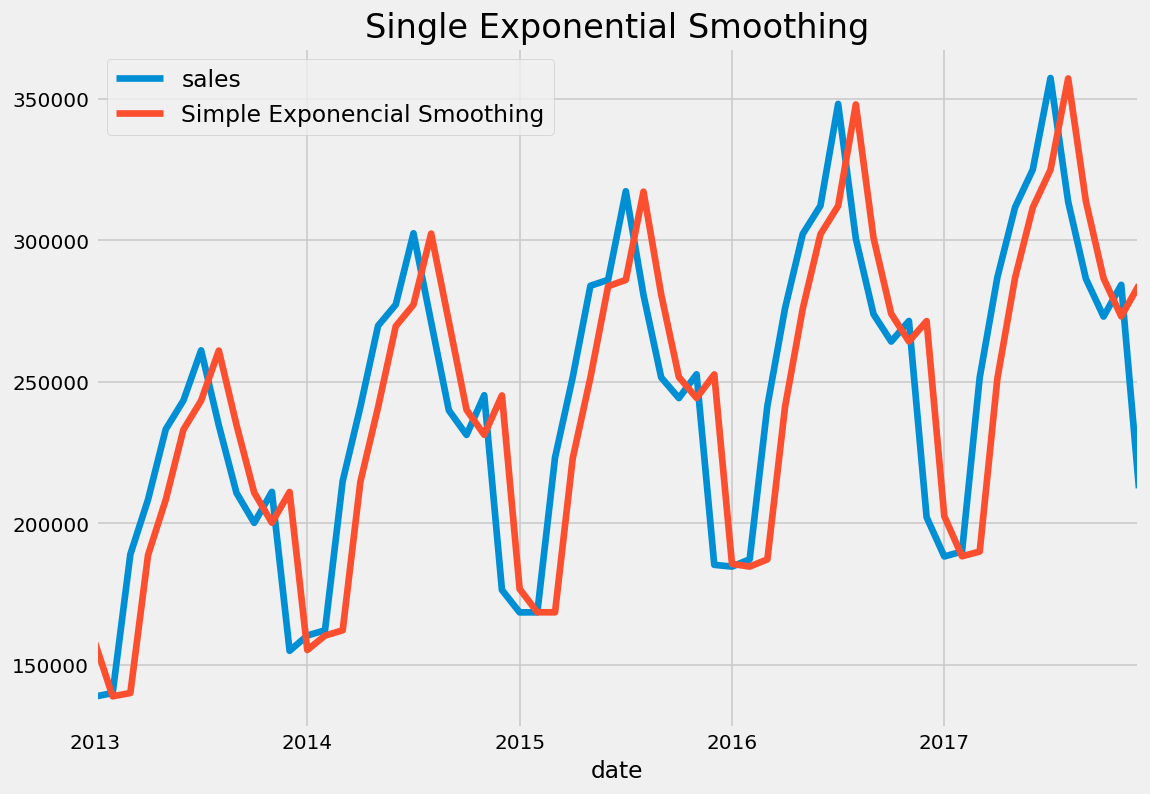

In [ ]:
HWES1 = SimpleExpSmoothing(Sales_mes, initialization_method="estimated").fit()
HWES1_fitted = HWES1.fittedvalues
HWES1_fitted.name = 'Simple Exponencial Smoothing'
pd.concat([Sales_mes, HWES1_fitted], axis=1).plot(title='Single Exponential Smoothing')

In [ ]:
results = pd.DataFrame(
    index=["SSE", "AIC", "BIC"])
results["Simple Exponencial"] = [HWES1.sse] + [HWES1.aic] + [HWES1.bic]

In [ ]:
print(HWES1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  sales   No. Observations:                   60
Model:             SimpleExpSmoothing   SSE                    62997737631.460
Optimized:                       True   AIC                           1250.321
Trend:                           None   BIC                           1254.510
Seasonal:                        None   AICC                          1251.048
Seasonal Periods:                None   Date:                 Sun, 16 Apr 2023
Box-Cox:                        False   Time:                         04:06:24
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
initial_level             1.5788e+05                

# **Double exponencial smoothing (DES)**

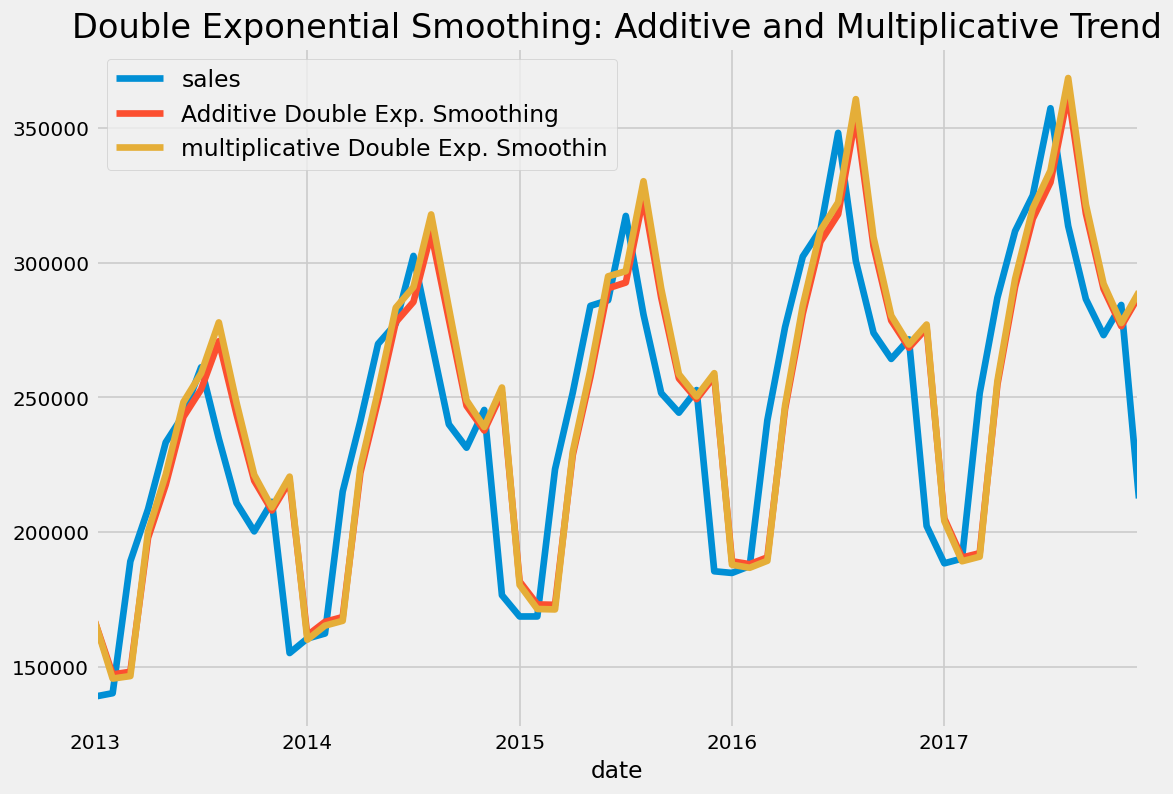

In [ ]:
HWES2_ADD = ExponentialSmoothing(Sales_mes,trend='add').fit()#.fittedvalues
HWES2_MUL = ExponentialSmoothing(Sales_mes,trend='mul').fit()#.fittedvalues
HWES2_ADD_fitted = HWES2_ADD.fittedvalues
HWES2_MUL_fitted = HWES2_MUL.fittedvalues
HWES2_ADD_fitted.name = 'Additive Double Exp. Smoothing'
HWES2_MUL_fitted.name = 'multiplicative Double Exp. Smoothin'
pd.concat([Sales_mes, HWES2_ADD_fitted, HWES2_MUL_fitted], axis=1).plot(title='Double Exponential Smoothing: Additive and Multiplicative Trend');

In [ ]:
results["Double Exp. - Additive"] = [HWES2_ADD.sse] + [HWES2_ADD.aic] + [HWES2_ADD.bic]
results["Double Exp. - Multiplicative"] = [HWES2_MUL.sse] + [HWES2_MUL.aic] + [HWES2_MUL.bic]

In [ ]:
HWES2_ADD.summary()

Dep. Variable:,sales,No. Observations:,60
Model:,ExponentialSmoothing,SSE,65329777624.011
Optimized:,True,AIC,1256.502
Trend:,Additive,BIC,1264.880
Seasonal:,None,AICC,1258.087
Seasonal Periods:,None,Date:,"Sun, 16 Apr 2023"
Box-Cox:,False,Time:,04:06:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0236905,beta,True


In [ ]:
HWES2_MUL.summary()

Dep. Variable:,sales,No. Observations:,60
Model:,ExponentialSmoothing,SSE,69923480990.441
Optimized:,True,AIC,1260.579
Trend:,Multiplicative,BIC,1268.957
Seasonal:,None,AICC,1262.164
Seasonal Periods:,None,Date:,"Sun, 16 Apr 2023"
Box-Cox:,False,Time:,04:06:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0473810,beta,True


*Continuamos buscando otro modelo, dado que las tecnicas de suavizamiento vistas no estan considerando estacionalidad

# **Triple exponencial smoothing (TES)**

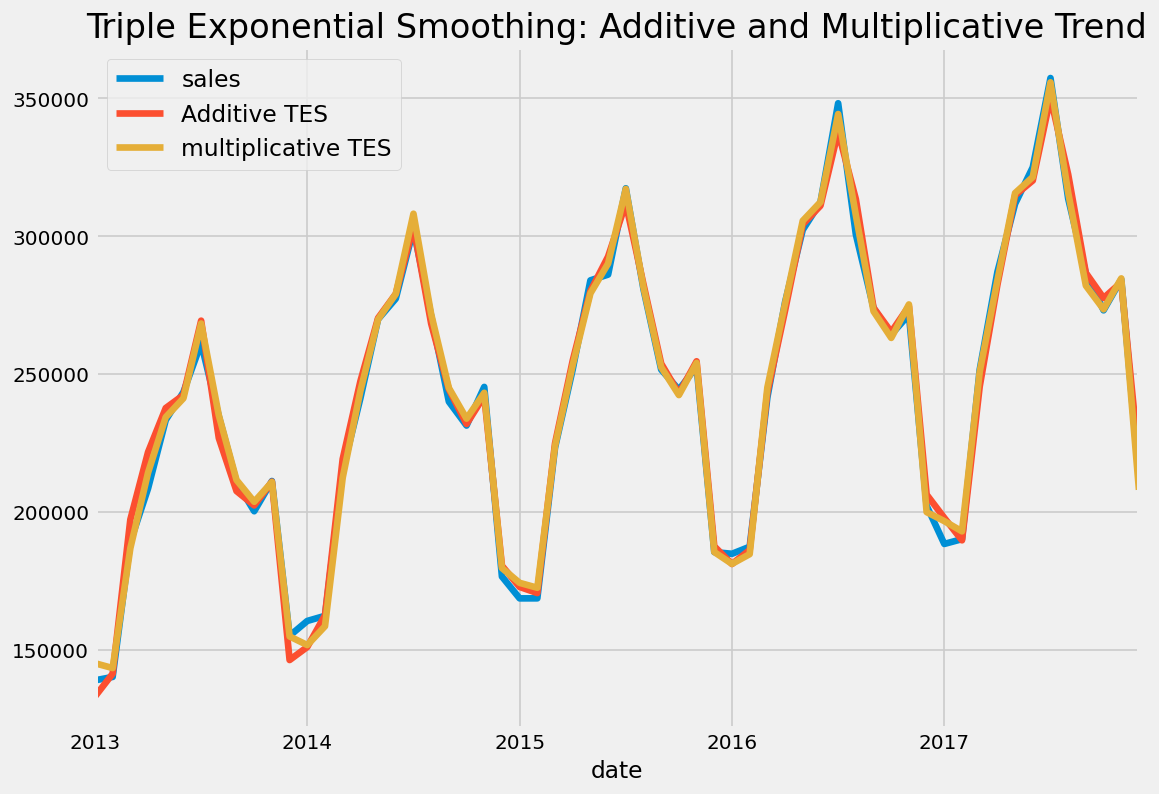

In [ ]:
HWES3_ADD = ExponentialSmoothing(Sales_mes,trend='add',seasonal='add',seasonal_periods=12).fit()
HWES3_MUL = ExponentialSmoothing(Sales_mes,trend='mul',seasonal='mul',seasonal_periods=12).fit()

HWES3_ADD_fitted = HWES3_ADD.fittedvalues
HWES3_MUL_fitted = HWES3_MUL.fittedvalues
HWES3_ADD_fitted.name = 'Additive TES'
HWES3_MUL_fitted.name = 'multiplicative TES'
pd.concat([Sales_mes, HWES3_ADD_fitted, HWES3_MUL_fitted], axis=1).plot(title='Triple Exponential Smoothing: Additive and Multiplicative Trend');

In [ ]:
results["Triple Exp. - Additive"] = [HWES3_ADD.sse] + [HWES3_ADD.aic] + [HWES3_ADD.bic]
results["Triple Exp. - Multiplicative"] = [HWES3_MUL.sse] + [HWES3_MUL.aic] + [HWES3_MUL.bic]
# El Triple Exponencial Multiplicativo resalta por tener menor error SSE en comparación a los otros exponenciales.

In [ ]:
results

,Simple Exponencial,Double Exp. - Additive,Double Exp. - Multiplicative,Triple Exp. - Additive,Triple Exp. - Multiplicative
SSE,6.299774e+10,6.532978e+10,6.992348e+10,1.556908e+09,7.267883e+08
AIC,1.250321e+03,1.256502e+03,1.260579e+03,1.056297e+03,1.010588e+03
BIC,1.254510e+03,1.264880e+03,1.268957e+03,1.089807e+03,1.044098e+03


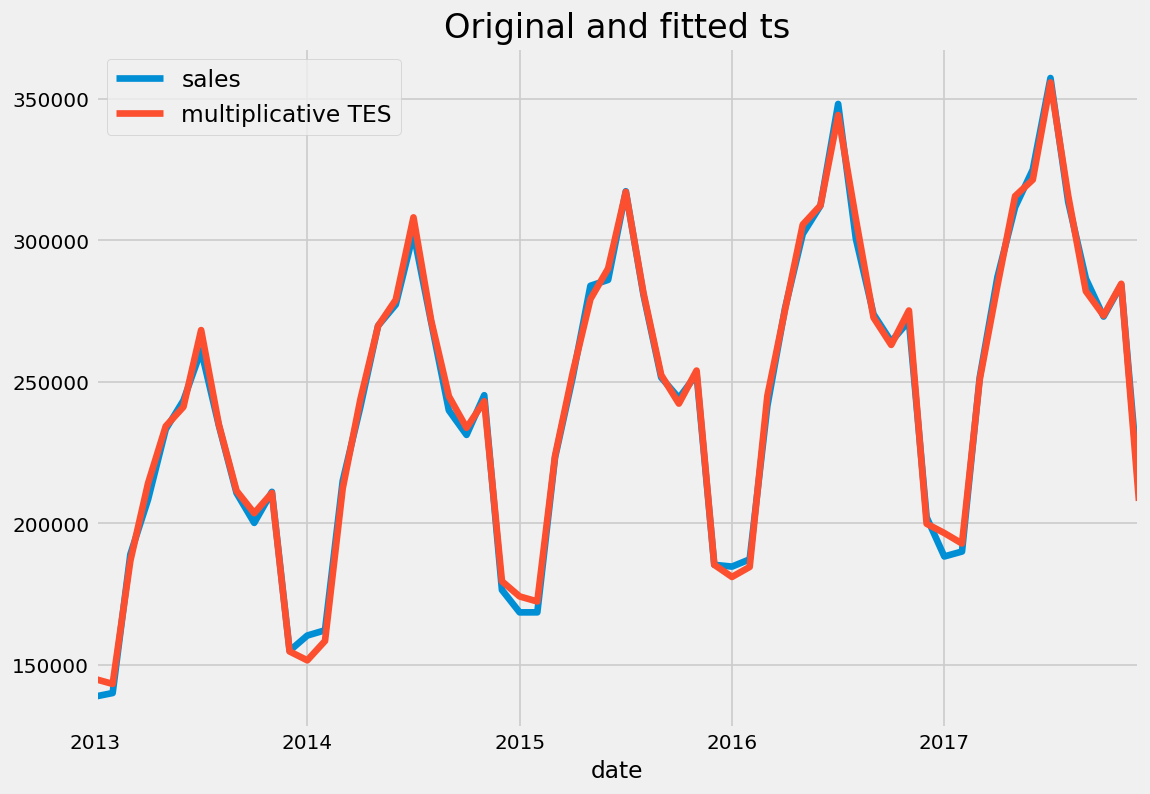

In [ ]:
pd.concat([Sales_mes, HWES3_MUL_fitted], axis=1).plot(title='Original and fitted ts');

In [ ]:
HWES3_MUL.summary()

Dep. Variable:,sales,No. Observations:,60
Model:,ExponentialSmoothing,SSE,726788287.742
Optimized:,True,AIC,1010.588
Trend:,Multiplicative,BIC,1044.098
Seasonal:,Multiplicative,AICC,1027.271
Seasonal Periods:,12,Date:,"Sun, 16 Apr 2023"
Box-Cox:,False,Time:,04:06:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5707143,alpha,True
smoothing_trend,0.0815306,beta,True


# **Holt-Winters**

In [ ]:
fit1 = ExponentialSmoothing(
    Sales_mes,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    Sales_mes,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()

fit3 = ExponentialSmoothing(
    Sales_mes,
    seasonal_periods=12,
    trend="mul",
    seasonal="add",
    initialization_method="estimated",
).fit()

fit4 = ExponentialSmoothing(
    Sales_mes,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul",
    initialization_method="estimated",
).fit()

In [ ]:
results2 = pd.DataFrame(
    index=["SSE", "AIC", "BIC"])

In [ ]:
results2["Holt Trend-Add Seas-Add"] = [fit1.sse] + [fit1.aic] + [fit1.bic]
results2["Holt Trend-Add Seas-Mul"] = [fit2.sse] + [fit2.aic] + [fit2.bic]
results2["Holt Trend-Mul Seas-Add"] = [fit3.sse] + [fit3.aic] + [fit3.bic]
results2["Holt Trend-Mul Seas-Mul"] = [fit4.sse] + [fit4.aic] + [fit4.bic]

In [ ]:
results2

,Holt Trend-Add Seas-Add,Holt Trend-Add Seas-Mul,Holt Trend-Mul Seas-Add,Holt Trend-Mul Seas-Mul
SSE,1.556908e+09,7.054268e+08,1.600289e+09,7.267883e+08
AIC,1.056297e+03,1.008798e+03,1.057946e+03,1.010588e+03
BIC,1.089807e+03,1.042308e+03,1.091456e+03,1.044098e+03


Observamos que el mejor modelo lo otorga el '**Holt Trend-Add Seas-Mul**', dado que tiene un menor SSE que el Mul-Mul

**Predicción**

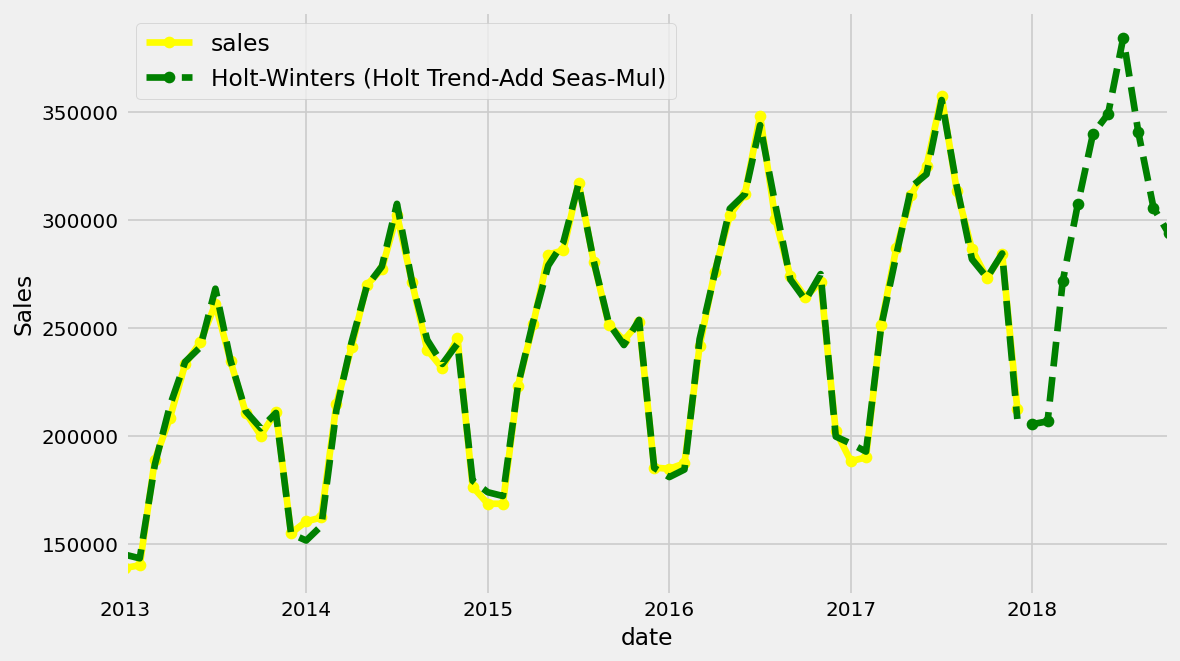

In [ ]:
ax = Sales_mes.plot(
    figsize=(10, 6),
    marker="o",
    color="yellow",
)

ax.set_ylabel("Sales")
ax.set_xlabel("Year")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")
fit2.forecast(10).rename("Holt-Winters (Holt Trend-Add Seas-Mul)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
# aqui obtamos solo por proyectar 10 periodos mensuales, dado que la base real tiene 60 periodos, y proyectar una mayor cantidad de periodos disminuiria la confianza en el modelo.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [ ]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [ ]:
evaluate_forecast(Sales_mes.sales, fit2.fittedvalues)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.995726,2717.015255,2512.463485,1.175711e+07,0.00028,3428.864764


# **Auto - SARIMA**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


import itertools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from math import sqrt

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [ ]:
Sales_m = Sales_mes.rename(columns={'sales': 'y'})
Sales_m.head()

,y
date,
2013-01-31,138832.0
2013-02-28,140085.0
2013-03-31,189060.0
2013-04-30,208446.0
2013-05-31,233266.0


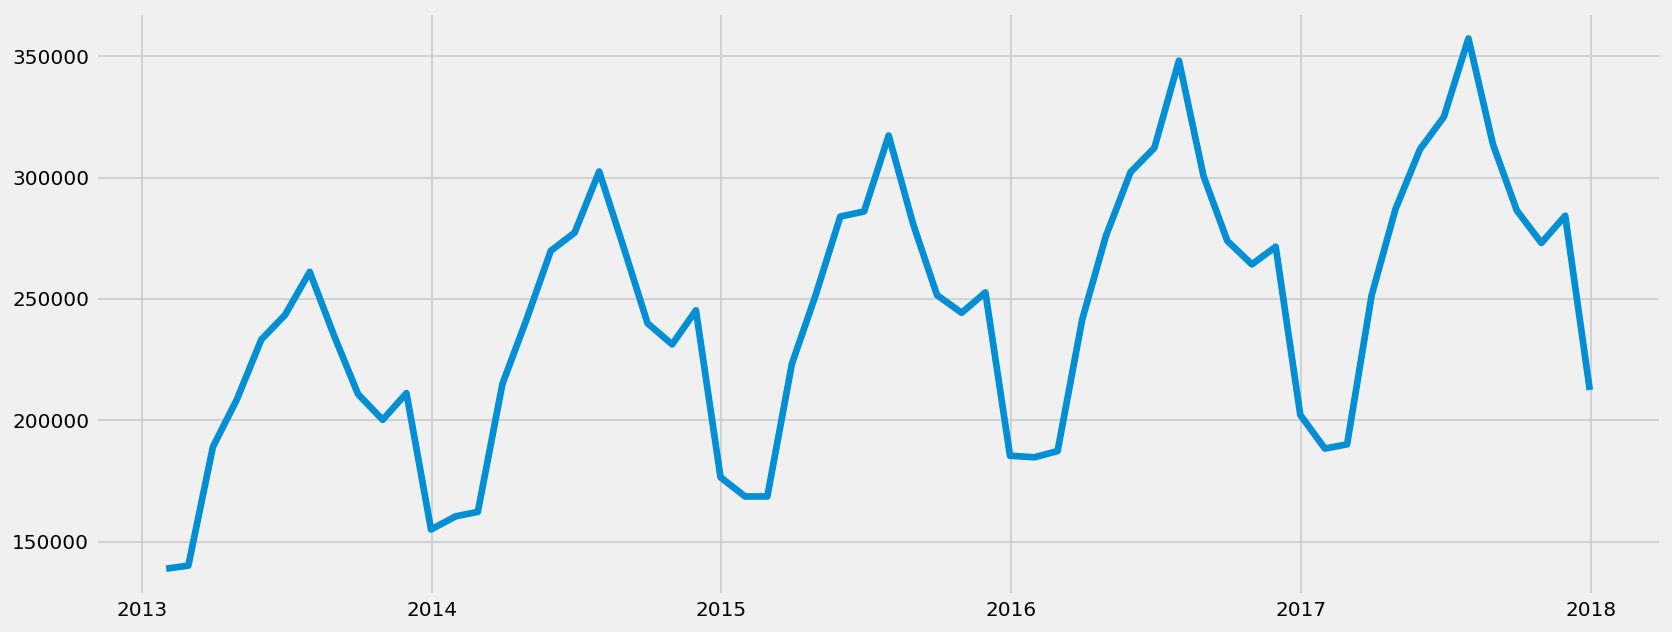

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(Sales_m)
plt.show()

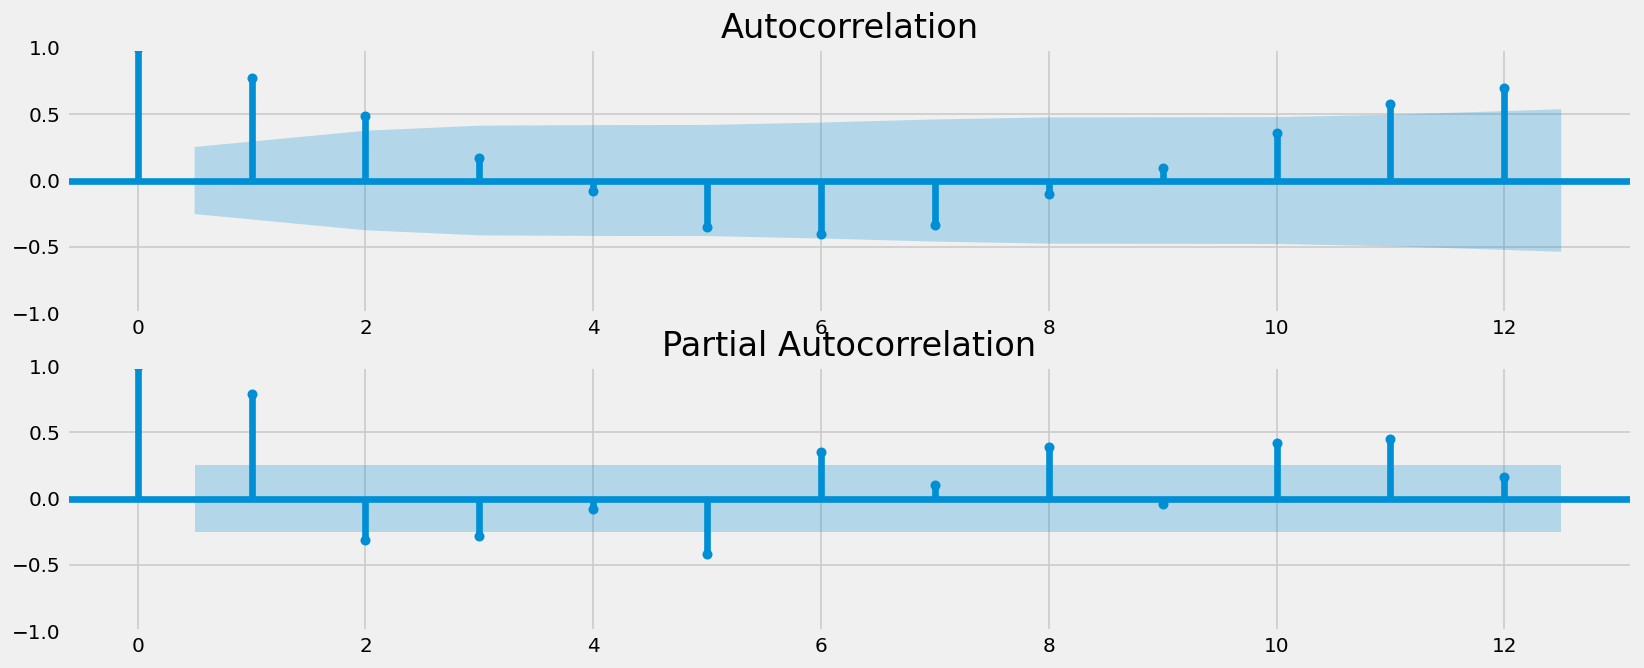

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(15,6))
plt.subplot(211)
plot_acf(Sales_m, ax=plt.gca(), lags = 12)
plt.subplot(212)
plot_pacf(Sales_m, ax=plt.gca(), lags = 12)
plt.show()

<Axes: xlabel='date'>

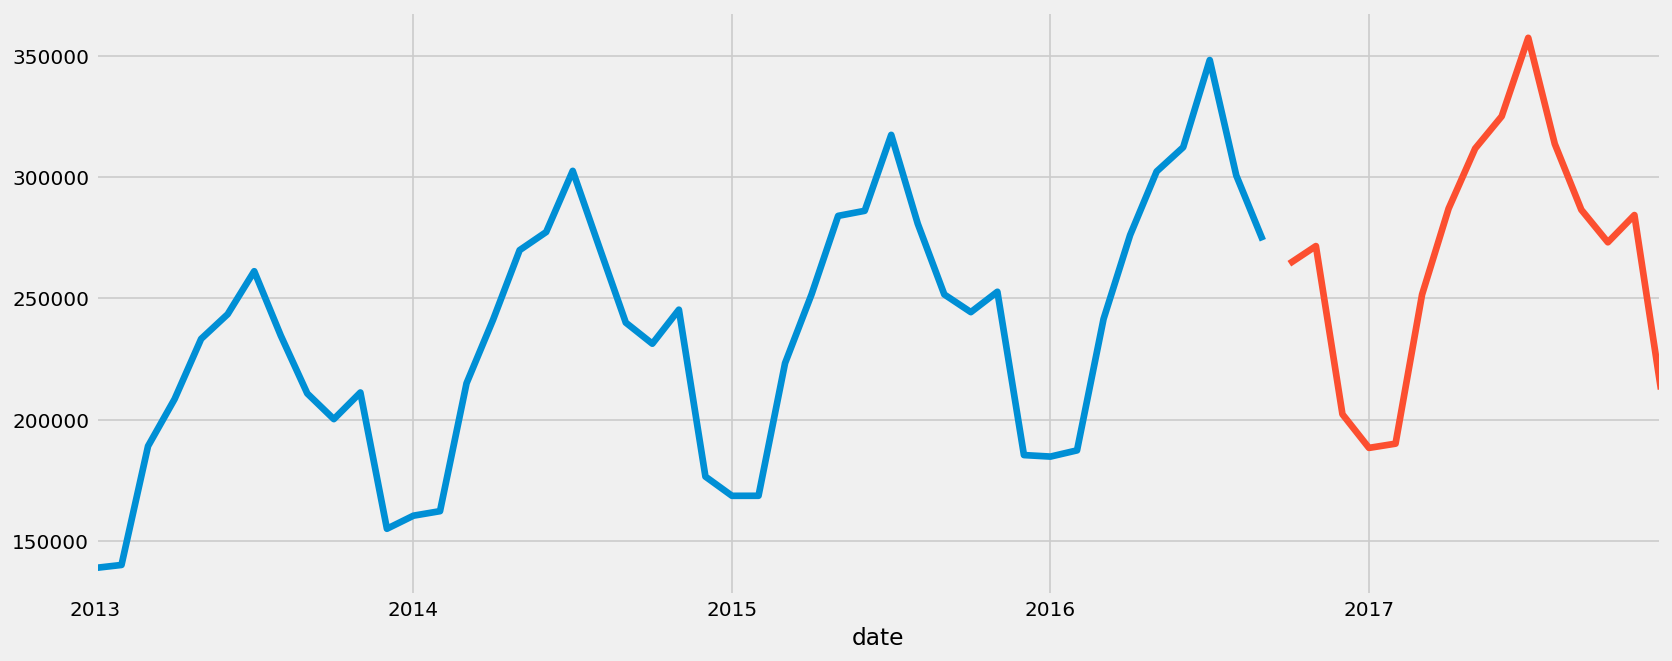

In [ ]:
#divide into train and validation set
train_m = Sales_m[:int(0.75*(len(Sales_m)))]
valid_m = Sales_m[int(0.75*(len(Sales_m))):]

#plotting the data
plt.figure(figsize=(15,6))
train_m['y'].plot()
valid_m['y'].plot()

Aplicando AUTO SARIMA para encontrar los mejores parámetros

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#building the model
from pmdarima import auto_arima
model = auto_arima(train_m, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12, stepwise=True)
model.fit(train_m)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=655.501, Time=3.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=705.008, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=720.627, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=692.609, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=758.488, Time=0.07 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=666.128, Time=2.69 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=inf, Time=6.63 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=6.98 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=657.724, Time=5.15 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(2,0,2)(2,1,2)[12] intercept   : AIC=inf, Time=7.32 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=654.870, Time=2.35 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=674.638, Time=

ARIMA(order=(1, 0, 3), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True)

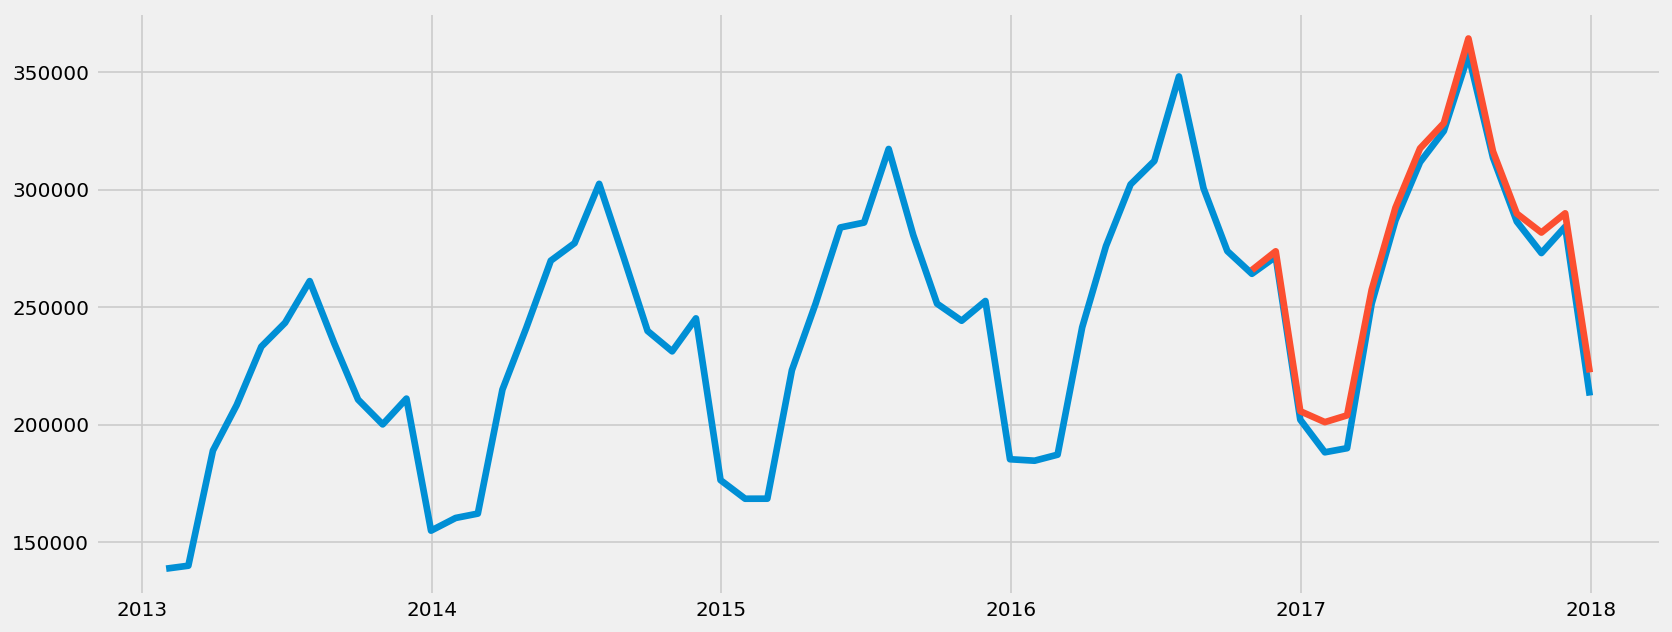

In [ ]:
start_index = valid_m.index.min()
end_index = valid_m.index.max()

#Predictions
pred = model.predict()

pred = model.predict(n_periods=len(valid))
pred = pd.DataFrame(pred,index = valid.index,columns=['Prediction'])

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

plt.figure(figsize=(15,6))
#plot the predictions for validation set
plt.plot(Sales_m.y, label='Train')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [ ]:
evaluate_forecast(Sales_m[start_index:end_index], forecast)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.979014,6138.773158,5682.704337,5.086282e+07,0.00101,7131.817158


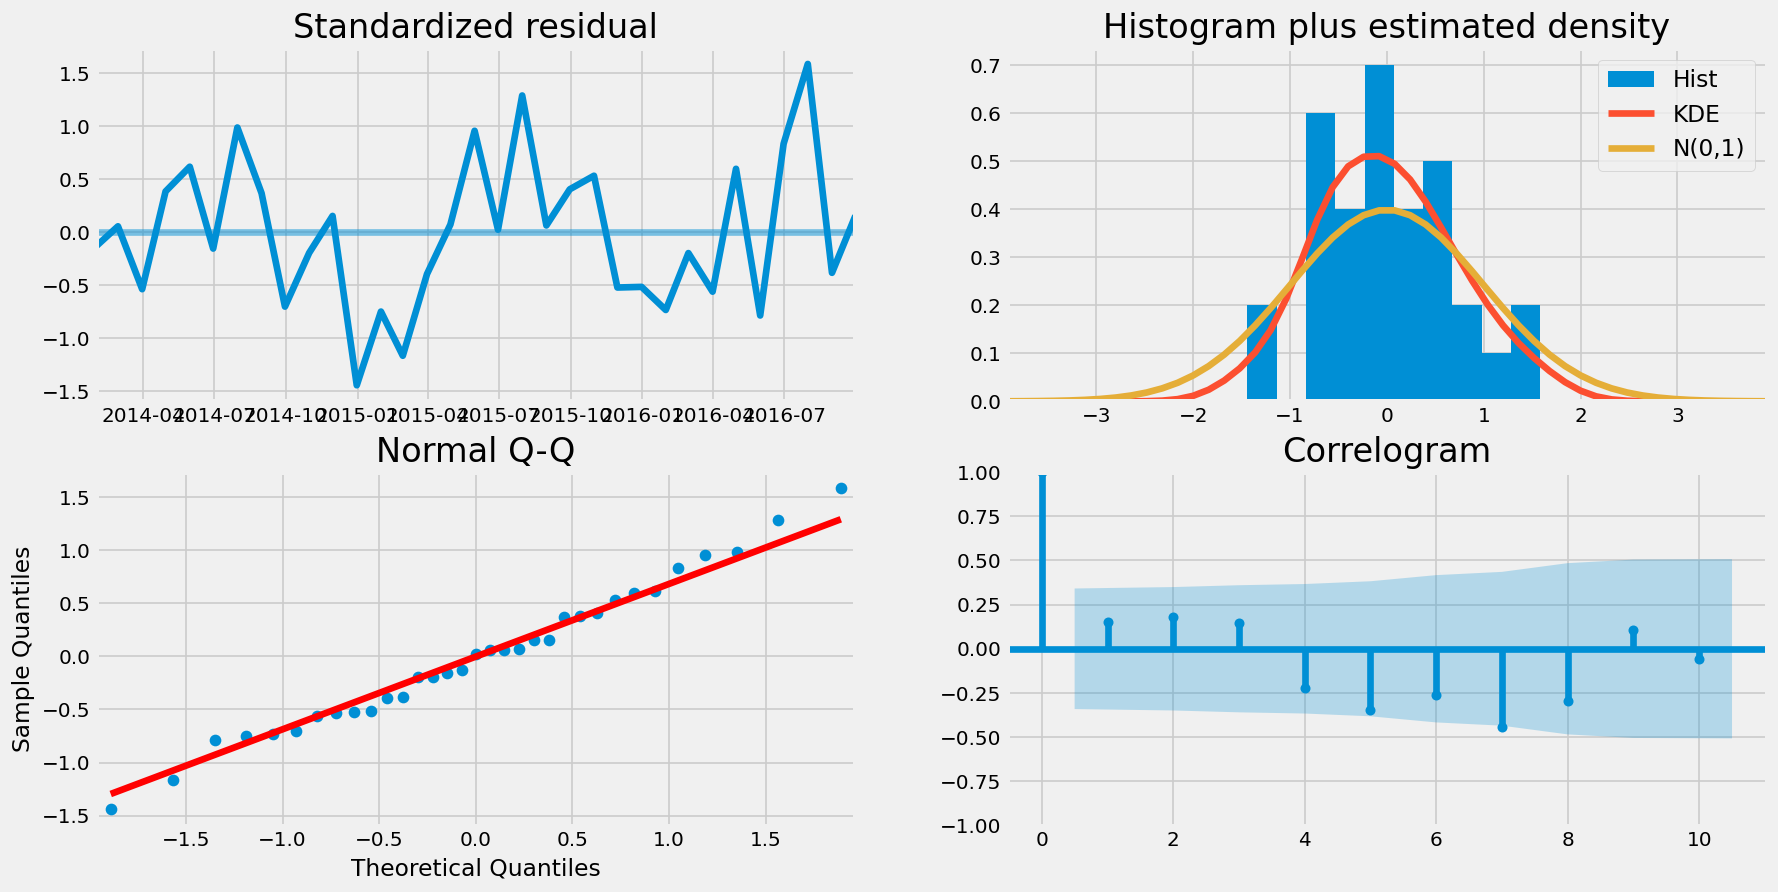

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()


Diagnóstico del modelo:

*Nuestra principal preocupación es garantizar que los residuos de nuestro modelo no estén correlacionados y normalmente se distribuyan con media cero.

*Si el modelo estacional ARIMA no satisface estas propiedades, es una buena indicación de que puede mejorarse aún más.

El diagnóstico del modelo sugiere que el modelo residual se distribuye normalmente en función de lo siguiente:

*En la gráfica superior derecha, la línea roja de KDE sigue de cerca con la línea N (0,1). Donde, N (0,1) es la notación estándar para una distribución normal con media 0 y desviación estándar de 1. Esta es una buena indicación de que los residuos se distribuyen normalmente.

*La gráfica qq en la parte inferior izquierda muestra que la distribución ordenada de los residuos (puntos azules) sigue la tendencia lineal de las muestras tomadas de una distribución normal estándar. Nuevamente, esta es una fuerte indicación de que los residuos se distribuyen normalmente.

*Los residuos a lo largo del tiempo (gráfico superior izquierdo) no muestran ninguna estacionalidad obvia y parecen ser ruido blanco.

*Esto se confirma mediante el gráfico de autocorrelación (es decir, correlograma) en la parte inferior derecha, que muestra que los residuos de series temporales tienen una baja correlación con versiones rezagadas de sí mismo. Quitando el 0 que naturalmente es el mismo dato, y un dato que se escapa apenas del rango que debe ser por la variación que no es constante.

# **Comentarios finales**

El mejor modelo obtenido en el analisis es el Holt-Winters (Holt Trend-Add Seas-Mul) con un R2 de 99.6% y un RMSE de 3'428.9 (casi la mitad de lo obtenido en el Auto Sarima)

* A continuación los 10 periodos resultado del mejor modelo obtenido y su gráfico.

In [ ]:
fit2.forecast(10)

2018-01-31    205481.374898
2018-02-28    206768.957393
2018-03-31    271563.688341
2018-04-30    307388.001497
2018-05-31    339927.085304
2018-06-30    349177.485214
2018-07-31    384443.701129
2018-08-31    340609.768508
2018-09-30    305714.398009
2018-10-31    293839.151553
Freq: M, dtype: float64

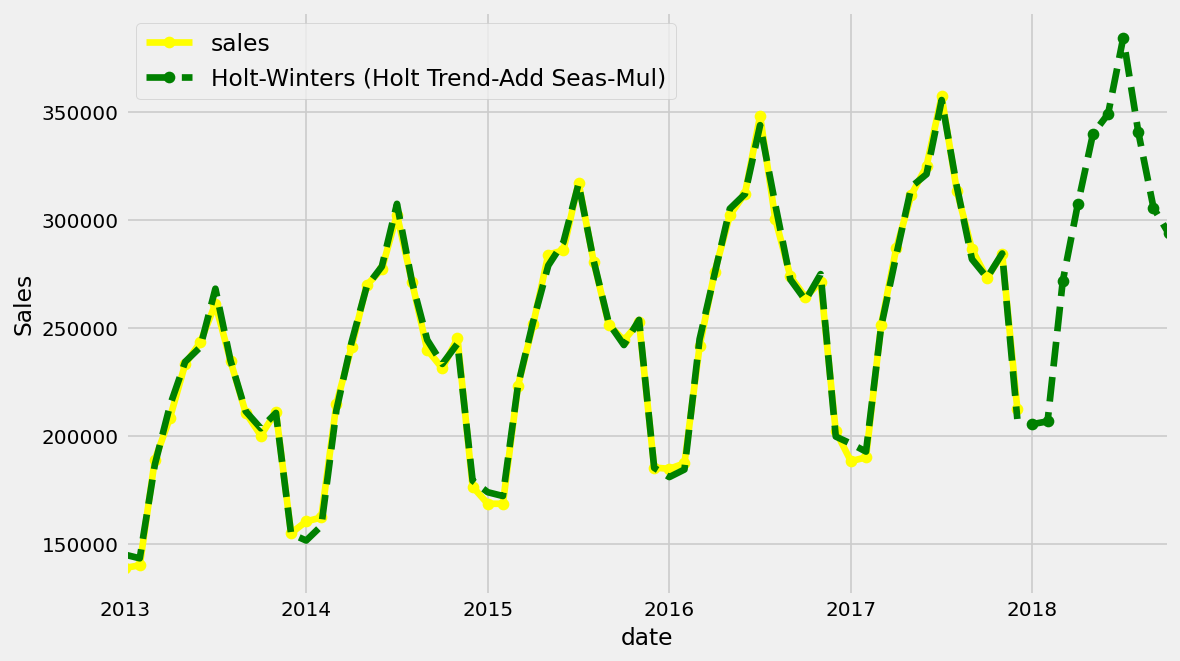

In [ ]:
ax = Sales_mes.plot(
    figsize=(10, 6),
    marker="o",
    color="yellow",
)

ax.set_ylabel("Sales")
ax.set_xlabel("Year")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")
fit2.forecast(10).rename("Holt-Winters (Holt Trend-Add Seas-Mul)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()